# Numpy Statistics & Probability
## Random Numbers with Python
Python 中自带有产生随机数的库 random，但是 random 里面有两种随机数产生方法，一种是伪随机的random类，另一种借助操作系统的随机产生安全的随机数SystemRandom类；

 - random() returns a float between 0 and 1 uniformly at random
 - randint(a,b) returns a random integer between a and b inclusive
 - choice(li) samples a random element from li
 - sample(li) returns a randomly selected subset of li
 - shuffle(li) randomly permutes the list li
 - uniform(a, b) returns a float uniformly distributed between a and b

### random伪随机

In [1]:
from random import random
random_number = random()
print random_number

0.16889393587


### SystemRandom随机

In [2]:
from random import SystemRandom
crypto = SystemRandom()
print(crypto.random())

0.861697883538


In [3]:
import random
def my_random_list(n, secure=True):
    random_lists = []
    if secure:
        random_generator = random.SystemRandom().random
    else:
        random_generator = random.random
    for _ in range(n):
        random_lists.append(random_generator())
    return random_lists
print my_random_list(5)

[0.4257777379125046, 0.6882285691208212, 0.999802732023553, 0.26986332205490415, 0.9775733869433579]


In [4]:
%%timeit
my_random_list(100)

1000 loops, best of 3: 200 µs per loop


In [5]:
%%timeit
my_random_list(100,False)

100000 loops, best of 3: 8.65 µs per loop


In [6]:
import numpy as np
np.random.random(10)

array([ 0.27452368,  0.77187204,  0.24901234,  0.74416124,  0.65771063,
        0.12142524,  0.40171976,  0.5018911 ,  0.06161399,  0.11495199])

In [7]:
%%timeit
np.random.random(100)

The slowest run took 33.74 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 1.9 µs per loop


### 产生符合概率分布和为1的随机数

In [8]:
import numpy as np
random_values = np.random.random(10)
print random_values
probable_random_values = random_values / random_values.sum()
print probable_random_values
print probable_random_values.sum()

[ 0.55817801  0.73724308  0.61660164  0.16040713  0.76239893  0.32715048
  0.04693124  0.90102208  0.82290265  0.72054751]
[ 0.09873345  0.13040742  0.10906773  0.02837365  0.13485712  0.05786809
  0.00830144  0.15937751  0.14555934  0.12745422]
1.0


### 产生随机密码

In [9]:
from random import SystemRandom
sr = SystemRandom() # create an instance of the SystemRandom class
    
def generate_password(length, 
                      valid_chars=None):
    """ generate_password(length, check_char) -> password
        length: the length of the created password
        check_char: a Boolean function used to check the validity of a char
    """
    if valid_chars==None:
        valid_chars = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
        valid_chars += valid_chars.lower() + "0123456789"
    
    password = ""
    counter = 0
    while counter < length:
        rnum = sr.randint(0, 128)
        char = chr(rnum)
        if char in valid_chars:
            password += chr(rnum)
            counter += 1
    return password
print("Automatically generated password by Python: " + generate_password(15))

Automatically generated password by Python: QNMHh7SFOcMiDL6


## Numpy random 和 Python random 的区别

In [10]:
import random
outcome = [ random.randint(1, 6) for _ in range(10) ]
print(outcome)

[1, 6, 1, 3, 5, 1, 5, 5, 3, 2]


In [11]:
import numpy as np
outcome = np.random.randint(1, 7, size=10)
print(outcome)
print(np.random.randint(1, 7, size=(5, 4)))

[1 2 3 4 6 1 5 5 4 2]
[[2 1 3 2]
 [5 5 1 2]
 [6 6 4 5]
 [6 3 5 2]
 [4 6 3 6]]


**Python random其实是闭区间，numpy random是半开半闭区间；numpy random 可以产生维度**

## Random Choices
core Python 中我们还可以用 choice 从一个 list 或 tuple 中随机选择某个元素，Numpy choice 提供更强大灵活的 多维度 随机选择；

In [12]:
from random import choice
programming_languages = ["C++", "Java", "Python", 
                        "Golang", "Javascript", "C",
                        "Ruby", "Pearl", "Scala", 
                        "Lisp", "Html", "CSS"]
print (choice(programming_languages))

CSS


In [13]:
from numpy.random import choice
print(choice(programming_languages))

x1 = choice(programming_languages, size=3)
print(x1)
x2 = choice(programming_languages, size=(3, 4))
print(x2)

print(choice(programming_languages, size=(3, 4), replace=False))

Pearl
['Lisp' 'Pearl' 'CSS']
[['Golang' 'Golang' 'C' 'Scala']
 ['CSS' 'CSS' 'Javascript' 'C++']
 ['C++' 'Ruby' 'Javascript' 'Scala']]
[['Javascript' 'C++' 'Python' 'Ruby']
 ['Java' 'CSS' 'Scala' 'C']
 ['Pearl' 'Golang' 'Html' 'Lisp']]


## Random Samples
### numpy.random.random_sample(shape)
 - 产生[0.0, 1.0)之间的连续均匀分布的随机数; 只有一个形状参数；
 - 产生[a, b)之间的数，使用公式 (b - a) * random_sample() + a;

In [14]:
import numpy as np
x = np.random.random_sample((3, 4))
print(x)
a = -3.4
b = 5.9
A = (b - a) * np.random.random_sample((3, 4)) + a
print(A)

[[ 0.51836106  0.90676182  0.13392795  0.13109821]
 [ 0.39302554  0.46879734  0.24627144  0.40894816]
 [ 0.41010848  0.63799337  0.1380191   0.88289495]]
[[-3.28042183  2.40699868  0.86679762  4.56155028]
 [ 3.22059842  2.77597382 -2.66749803  3.15871745]
 [-2.30100265  3.07235352 -0.15735709 -3.0834553 ]]


### Core Python sample
sample(population, k)
 - 产生 k 个范围在 population 的随机数；

In [15]:
import random
print(random.sample(range(1, 50), 6))

[1, 15, 5, 21, 12, 30]


# Weighted choice & sample
- [Monty_Hall_problem](https://en.wikipedia.org/wiki/Monty_Hall_problem)
- [MontyFinal2.pdf](http://educ.jmu.edu/~lucassk/Papers/MontyFinal2.pdf)
- [montyfall.pdf](http://www.probability.ca/jeff/writing/montyfall.pdf)

## Weighted Random Choices
### 找到 x 所在的区间

In [16]:
def find_interval(x, partition):
    '''
    返回x所在区间的左边界索引；
    如果 partition[i] < x < partition[i+1]， 则返回 i; 否则返回 -1；
    '''
    for i in range(0, len(partition)):
        if x < partition[i]:
            return i - 1
    return -1

I = [0, 3, 5, 7.8, 9, 12, 13.8, 16]
for x in [-1.3, 0, 0.1, 3.2, 5, 6.2, 7.9, 10.8, 13.9, 15, 16, 16.5]:
    print find_interval(x, I),

-1 0 0 1 2 2 3 4 6 6 -1 -1


### 累计概率和

In [17]:
import numpy as np
weights = [0.2, 0.5, 0.3]
cum_weights = [0] + list(np.cumsum(weights))
print(cum_weights)

[0, 0.20000000000000001, 0.69999999999999996, 1.0]


>如何才能以某一种固定的概率随机取数呢？例如，我要随机的从 [1,2,3] 取数，但是要求是按照 [0.2, 0.5, 0.3] 的概率取出来，即最终表现应该是取出来的数， 1 占 20%， 2 占 50%， 3 占 30%；

**从均匀分布random中产生非均匀分布，就是以非均匀的概率为区间，做随机取数实验，random 产生的随机数会落到相应的区间，而每个区间对应一个相应概率的随机数字**

In [18]:
import numpy as np
import random
def weighted_choice(sequence, 
                    weights,
                    secure=True):
    """ 
    weighted_choice selects a random element of 
    the sequence according to the list of weights
    """
    
    if secure:
        crypto = random.SystemRandom()
        x = crypto.random()
    else:
        x = np.random.random()
    cum_weights = [0] + list(np.cumsum(weights))
    index = find_interval(x, cum_weights)
    return sequence[index]

In [19]:
from collections import Counter
faces_of_die = [1, 2, 3, 4, 5, 6]
weights = [1.0/12, 1.0/6, 1.0/6, 1.0/6, 1.0/6, 3.0/12]
outcomes = []
n = 100000
for _ in range(n):
    outcomes.append(weighted_choice(faces_of_die, weights))
c = Counter(outcomes)
for key in c:
    c[key] = c[key] * 1.0 / n
    
print(sorted(c.values()))

[0.08426, 0.16529, 0.16685, 0.16723, 0.16817, 0.2482]


## Weighted Sample
随机取样的模拟，就是每一次以某种概率取出一个元素，总共取k次;
随机取样试验： 8 种不同颜色的球，每一种球是无穷的，但是他们的比例是[1,4,4,2,2,1,3,7],一次取出三个不同颜色的球
### 不放回取样

In [20]:
def weighted_sample(population, weights, k):
    """ 
    This function draws a random sample of length k 
    from the sequence 'population' according to the 
    list of weights
    """
    sample = set()
    population = list(population)
    weights = list(weights) 
    while len(sample) < k:
        choice = weighted_choice(population, weights)
        sample.add(choice)
        index = population.index(choice)
        weights.pop(index)
        population.remove(choice)
        weights = [ x / sum(weights) for x in weights]
    return list(sample)

balls = ["red", "green", "blue", "yellow", "black", "white", "pink", "orange"]
weights = [ 1.0/24, 1.0/6, 1.0/6, 1.0/12, 1.0/12, 1.0/24, 1.0/8, 7.0/24]
for i in range(10):
    print(weighted_sample(balls, weights, 3))

['blue', 'black', 'yellow']
['orange', 'blue', 'green']
['orange', 'pink', 'green']
['blue', 'green', 'yellow']
['pink', 'orange', 'white']
['pink', 'green', 'red']
['blue', 'orange', 'black']
['pink', 'green', 'yellow']
['orange', 'blue', 'green']
['blue', 'orange', 'pink']


### 有放回的取样
n 次独立性试验，只是如果取的样本已经取过，就认为失败，不加入结果集，重新试验。其实和不放回是一样的

In [21]:
def weighted_sample_alternative(population, weights, k):
    """ 
    Alternative way to previous implementation.
        
    This function draws a random sample of length k 
    from the sequence 'population' according to the 
    list of weights
    """
    sample = set()
    population = list(population)
    weights = list(weights)
    while len(sample) < k:
        choice = weighted_choice(population, weights)
        if choice not in sample:
            sample.add(choice)
    return list(sample)

In [22]:
n = 100000
orange_counter = 0
orange_counter_alternative = 0
for i in range(n):
    if "orange" in weighted_sample(balls, weights, 3):
        orange_counter += 1
    if "orange" in weighted_sample_alternative(balls, weights, 3):
        orange_counter_alternative += 1 
        
print(1.0 * orange_counter / n)
print(1.0 * orange_counter_alternative / n)

0.71165
0.71066


## Cartesian Choice笛卡尔取样
从多个集合中按每个集合对应的元素比例取一个元素，最后按顺序返回各个集合中一个随机取出的样本的集合；

**均匀笛卡尔取样, 即 每个集合中的元素被取出来的概率均等。**

In [23]:
import random
def cartesian_choice(*iterables):
    res = []
    for population in iterables:
        lst = random.choice(population)
        res.append(lst)
    return res
cartesian_choice(["The", "A"],
                 ["red", "green", "blue", "yellow", "grey"], 
                 ["car", "house", "fish", "light"],
                 ["smells", "dreams", "blinks"])

['A', 'blue', 'car', 'dreams']

**非均匀笛卡尔取样，即 每个集合中元素被取出来的概率不等。此时要给定每个集合元素的概率比。**

In [24]:
import random
def weighted_cartesian_choice(*iterables):
    """
    A list with weighted random choices from each iterable of iterables 
    is being created in respective order
    """
    res = []
    for population, weight in iterables:
        lst = weighted_choice(population, weight)
        res.append(lst)
    return res
determiners = (["The", "A", "Each", "Every", "No"], 
               [0.3, 0.3, 0.1, 0.1, 0.2])
colours = (["red", "green", "blue", "yellow", "grey"], 
           [0.1, 0.3, 0.3, 0.2, 0.2])
nouns = (["water", "elephant", "fish", "light", "programming language"], 
         [0.3, 0.2, 0.1, 0.1, 0.3])
nouns2 = (["of happiness", "of chocolate", "of wisdom", "of challenges", "of air"], 
         [0.5, 0.2, 0.1, 0.1, 0.1])
verb_phrases = (["smells", "dreams", "thinks", "is made of"], 
         [0.4, 0.3, 0.3])
print("It may or may not be true:")
for i in range(10):
    res = weighted_cartesian_choice(determiners,
                                    colours,
                                    nouns,
                                    verb_phrases,
                                    nouns2)
    print(" ".join(res) + ".")

It may or may not be true:
Each red water thinks of happiness.
A blue water dreams of happiness.
Every green programming language smells of chocolate.
The grey elephant thinks of chocolate.
The blue programming language thinks of challenges.
The blue light smells of chocolate.
The green programming language thinks of chocolate.
The green programming language smells of happiness.
The blue programming language dreams of happiness.
No yellow water smells of happiness.


## Random Seed
random seed 可以用来产生重复的随机序列


In [25]:
import random
help(random.seed)

Help on method seed in module random:

seed(self, a=None) method of random.Random instance
    Initialize internal state from hashable object.
    
    None or no argument seeds from current time or from an operating
    system specific randomness source if available.
    
    If a is not None or an int or long, hash(a) is used instead.



In [26]:
import random
random.seed(42)
for _ in range(10):
    print random.randint(1, 10),
    
print("\nLet's create the same random numbers again:")
random.seed(42)
for _ in range(10):
    print random.randint(1, 10),

7 1 3 3 8 7 9 1 5 1 
Let's create the same random numbers again:
7 1 3 3 8 7 9 1 5 1


## Random Number Gaussian and Normalvariate Distribution服从高斯和正态分布的随机数

 - gauss
 - normalvariate

In [27]:
from random import gauss
n = 1000
values = []
frequencies = {}
while len(values) < n:
    value = gauss(180, 30)
    if 130 < value < 230:
        frequencies[int(value)] = frequencies.get(int(value), 0) + 1
        values.append(value)
        
print(values[:10])

[186.96893210720162, 214.90676059797428, 199.69909520396007, 183.31521532331496, 157.85035192965537, 149.56012897536849, 187.39026585633607, 219.33242481612143, 181.24970591710152, 176.81030118687647]


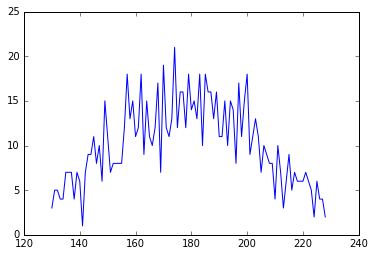

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
freq = list(frequencies.items())
freq.sort()
plt.plot(*list(zip(*freq)))

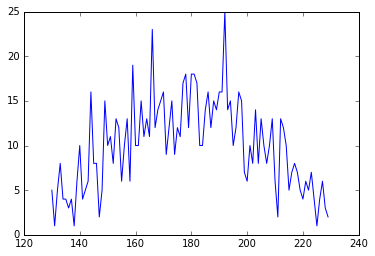

In [29]:
from random import normalvariate
n = 1000
values = []
frequencies = {}
while len(values) < n:
    value = normalvariate(180, 30)
    if 130 < value < 230:
        frequencies[int(value)] = frequencies.get(int(value), 0) + 1
        values.append(value)
freq = list(frequencies.items())
freq.sort()
plt.plot(*list(zip(*freq)))

## 服从二项分布的随机数(zero/one distribution)

In [30]:
import random
def random_ones_and_zeros(p):
    """ p: probability 0 <= p <= 1
        returns a 1 with the probability p
    """
    val = random.random()
    return 1 if val < p else 0


In [31]:
n = 1000
1.0 * sum(random_ones_and_zeros(0.7) for _ in range(n)) / n

0.725

使用 generator 的优化版本

In [32]:
import random
def random_ones_and_zeros(p):
    while True:
        val =  random.random()
        yield 1 if val < p else 0

def firstn(generator, n):
    for i in range(n):
        yield next(generator)
        
n = 1000000
1.0 * sum(x for x in firstn(random_ones_and_zeros(0.8), n)) / n
    

0.800583

## Numpy Weighted Random Choice  & Sample
 - [weighted-random-generation-in-python](http://eli.thegreenplace.net/2010/01/22/weighted-random-generation-in-python/)
 - [weights.pdf](http://faculty.wcas.northwestern.edu/~ane686/research/weights.pdf)
 - [Equal Probability of Selection](http://www.ph.ucla.edu/epi/rapidsurveys/RScourse/chap4rapid_2004.pdf)
-----------
- choice(a, size=None, replace=True, p=None): Generates a random sample from a given 1-D array
  - a : 1-D array-like or int
    - ndarray
    - int, the random sample 通过 np.arange(n) 产生
  - size : int or tuple of ints, optional
    - 输出的 shape. 默认为空，返回一个值
  - replace : boolean, optional
    - Whether the sample is with or without replacement,有放回还是不放回取样
  - p : 1-D array-like, optional
    - The probabilities associated with each entry in a.
-----------

In [33]:
from numpy.random import choice
professions = ["scientist", 
               "philosopher", 
               "engineer", 
               "priest", 
               "programmer"]
probabilities = [0.2, 0.05, 0.3, 0.15, 0.3]
choice(professions, p=probabilities)

from collections import Counter
c = Counter()
for _ in range(1000):
    profession = choice(professions, p=probabilities)
    c[profession] += 1
    
print(c)
s = sum(c.values())
for el in c:
    c[el] /= s * 1.0
print(c)

Counter({'programmer': 318, 'engineer': 313, 'scientist': 200, 'priest': 120, 'philosopher': 49})
Counter({'programmer': 0.318, 'engineer': 0.313, 'scientist': 0.2, 'priest': 0.12, 'philosopher': 0.049})


# Data Synthesize
使用前面的概率模型和函数来合成测试数据集，**如果没有数据，测试数据可以认为由数据库中的记录集合生成的，合成一条记录时，每个字段可以从每一个字段取值集合中随机抽取出来，如果没有固定规则的话**。在进行数据合成操作的时候，zip函数经常使用，我们来看看zip的作用！

### ZIP 函数

In [34]:
database = [("John", 80), ("Eve", 70), ("Jane", 2)]
l = zip(database) # 注意这里相当于给 zip 传递的参数只有一个， 即 database 这个列表
print l
# 等价于 zip(("John", 80), ("Eve", 70), ("Jane", 2)), 加 * 代表可变参数列表的意思，*database 相当于传递多个参数，每个参数是一个二元tuple

names, weights = zip(*database)
print weights
print zip(("John", 80), ("Eve", 70), ("Jane", 2))

l1 = ["John", "Eve", "Jane"]
l2 = ["Paul", "Frank", "Laura"]
l3 = [8, 20, 6]
zip(l1,l2,l3)


[(('John', 80),), (('Eve', 70),), (('Jane', 2),)]
(80, 70, 2)
[('John', 'Eve', 'Jane'), (80, 70, 2)]


[('John', 'Paul', 8), ('Eve', 'Frank', 20), ('Jane', 'Laura', 6)]

其实**zip(\*iterable)的作用就是将参数列表中每一个 list 中对应第 i 个位置的元素连接（zip）成一个 tuple， 有 n 个 list， tuple 就是 n 元组，返回一个含有 最短长度(最短list的长度)的 tuple 为元素的列表；**

 - zip(seq1 [, seq2 [...]]) -> [(seq1[0], seq2[0] ...), (...)]
   - Return a list of tuples, where each tuple contains the i-th element from each of the argument sequences.  The returned list is truncated in length to the length of the shortest argument sequence.


![zip](./numpynotes-2-statistics-and-probability/zip.png)

### 数据合成例子

In [1]:
weighted_firstnames = [ ("John", 80), ("Eve", 70), ("Jane", 2), 
                        ("Paul", 8), ("Frank", 20), ("Laura", 6), 
                        ("Robert", 17), ("Zoe", 3), ("Roger", 8), 
                        ("Simone", 9), ("Bernard", 8), ("Sarah", 7),
                        ("Yvonne", 11), ("Bill", 12), ("Bernd", 10)]
weighted_surnames = [('Singer', 2), ('Miles', 2), ('Moore', 5), 
                     ('Looper', 1), ('Rampman', 1), ('Chopman', 1), 
                     ('Smiley', 1), ('Bychan', 1), ('Smith', 150), 
                     ('Baker', 144), ('Miller', 87), ('Cook', 5),
                     ('Joyce', 1), ('Bush', 5), ('Shorter', 6), 
                     ('Klein', 1)]
firstnames, weights = zip(*weighted_firstnames)
wsum = sum(weights)
weights_firstnames = [ 1.0 * x / wsum for x in weights]
surnames, weights = zip(*weighted_surnames)
wsum = sum(weights)
weights_surnames = [ 1.0 * x / wsum for x in weights]
weights = (weights_firstnames, weights_surnames)
#print (firstnames, surnames)
#print weights

def synthesizer( data, weights=None, format_func=None, repeats=True):
    """
    "data" is a tuple or list of lists or tuples containing the 
    data.
    
    "weights" is a list or tuple of lists or tuples with the 
    corresponding weights of the data lists or tuples.
    
    "format_func" is a reference to a function which defines
    how a random result of the creator function will be formated. 
    If None,the generator "synthesize" will yield the list "res".
    
    If "repeats" is set to True, the output values yielded by 
    "synthesize" will not be unique.
    """
    
    if not repeats:
        memory = set()
        
    def choice(data, weights):
        if weights:
            return weighted_cartesian_choice(*zip(data, weights))
        else:
            return cartesian_choice(*data)
    def synthesize():
        while True:
            res = choice(data, weights)
            if not repeats:
                sres = str(res)
                while sres in memory:
                    res = choice(data, weights)
                    sres = str(res)
                memory.add(sres)
            if format_func:
                yield format_func(res)
            else:
                yield res
    return synthesize
        
recruit_employee = synthesizer( (firstnames, surnames), 
                                weights = weights,
                                format_func=lambda x: " ".join(x),
                                repeats=False)
employee = recruit_employee()
for _ in range(8):
    print(next(employee))

NameError: global name 'weighted_cartesian_choice' is not defined